# Normalization | Min Max Scalar
    Normalization is a technique used to adjust the range of feature values in a dataset. Min-max scaling is a popular normalization technique that transforms the data to fit within a specific range, typically [0, 1]. This method scales the data to ensure that the minimum value of each feature becomes 0 and the maximum value becomes 1.

    A value is normalized as follows:
    
    y = (x — min) / (max — min)
    Here y→output data after scale
    
    X→ input Data
    
    min→minimum value of a column
    
    max→maximum value of a column
    
    the minimum and maximum values pertain to the value x being normalized.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
employee = {'EMPLID': ['empl1','empl2','empl3','empl4','empl5','empl6'],
            'AGE': [20,50,40,30,60,35],
            'SALARY': [25000,50000,35000,30000,70000,30000],
            'QUIT_JOB':['Yes','No','No','Yes','Yes','No']}
df = pd.DataFrame(employee)
df

,EMPLID,AGE,SALARY,QUIT_JOB
0,empl1,20,25000,Yes
1,empl2,50,50000,No
2,empl3,40,35000,No
3,empl4,30,30000,Yes
4,empl5,60,70000,Yes
5,empl6,35,30000,No


In [7]:
scalar = MinMaxScaler()
scalar.fit(df[['AGE', 'SALARY']])
scaled_values = scalar.transform(df[['AGE','SALARY']])

# fit_transform can do both at the same time
s = scalar.fit_transform(df[['AGE','SALARY']])

scaled_values_df = pd.DataFrame(scaled_values, columns=['New_Age', 'New_Salary'])

df_1 = pd.concat([df,scaled_values_df], axis=1)
df_1

,EMPLID,AGE,SALARY,QUIT_JOB,New_Age,New_Salary
0,empl1,20,25000,Yes,0.000,0.000000
1,empl2,50,50000,No,0.750,0.555556
2,empl3,40,35000,No,0.500,0.222222
3,empl4,30,30000,Yes,0.250,0.111111
4,empl5,60,70000,Yes,1.000,1.000000
5,empl6,35,30000,No,0.375,0.111111


<Axes: xlabel='AGE', ylabel='SALARY'>

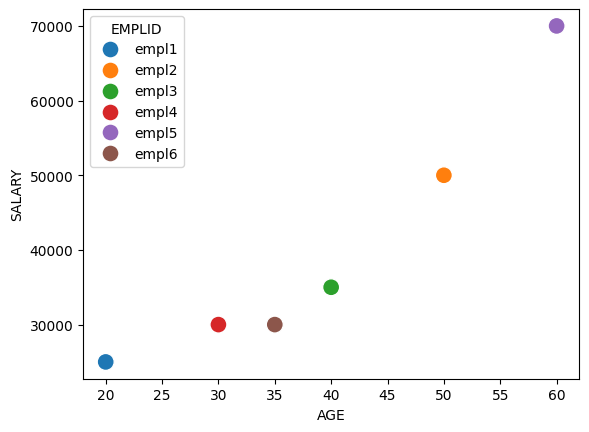

In [10]:
sns.scatterplot(x='AGE', y='SALARY', hue='EMPLID', data=df, s=150)  # this is directly to the data frame

    x='AGE': Specifies the column to be used for the x-axis.
    y='SALARY': Specifies the column to be used for the y-axis.
    size=500: Adjusts the size of the markers. Note that for adjusting marker size, sizes or size parameter can be used but size is not directly for scatter plot marker sizes, so if the intent is to specify all markers as a specific size, you would use s in plt.scatter or adjust through scatter_kws.
    hue='EMPLID': Specifies the column used to color the markers.
    data=df: Specifies the DataFrame containing the data.

<Axes: >

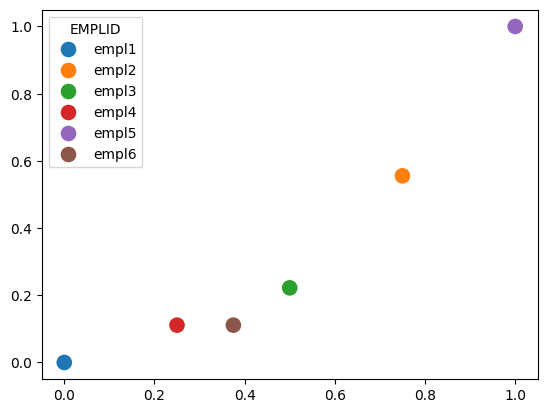

In [12]:
# Fro the scaled values
sns.scatterplot(x=scaled_values[:,0],y=scaled_values[:,1],s=150,hue=df['EMPLID'], legend='auto')

# scaled_values[:,0] - first column
# scaled_values[:,1] - second column
# scaled_values[1,:] - second row alone

# Normalization | standard Scalar

In [13]:
employee = {'EMPLID': ['empl1','empl2','empl3','empl4','empl5','empl6'],
            'AGE': [20,50,40,30,60,35],
            'SALARY': [25000,50000,35000,30000,70000,30000],
            'QUIT_JOB':['Yes','No','No','Yes','Yes','No']}
df1 = pd.DataFrame(employee)
df1

,EMPLID,AGE,SALARY,QUIT_JOB
0,empl1,20,25000,Yes
1,empl2,50,50000,No
2,empl3,40,35000,No
3,empl4,30,30000,Yes
4,empl5,60,70000,Yes
5,empl6,35,30000,No


#### Before finding the standard scalar
    let's find the mean and standard deviation of the current features('AGE', 'SALARY')

AGE: 
 Mean: 39.166666666666664 
 standard deviation: 14.288690166235206 

SALARY: 
 Mean: 40000.0 
 standard deviation: 17029.386365926403


<Axes: xlabel='AGE', ylabel='SALARY'>

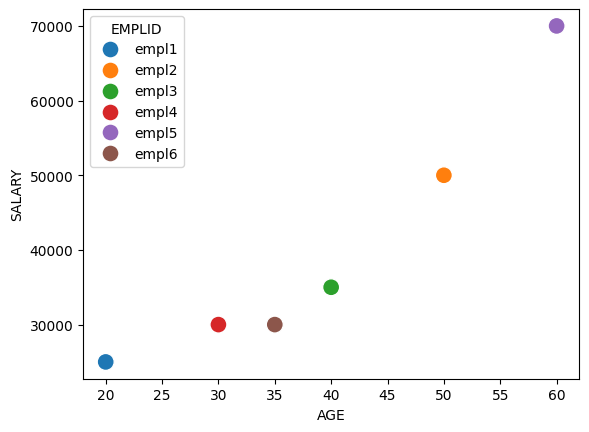

In [15]:
print(f'''AGE: \n Mean: {df1['AGE'].mean()} \n standard deviation: {df1['AGE'].std()} \n
SALARY: \n Mean: {df1['SALARY'].mean()} \n standard deviation: {df1['SALARY'].std()}''')

sns.scatterplot(data=df1,x=df['AGE'],y=df['SALARY'],hue=df['EMPLID'],s=150)

### using the standard scalar model

In [16]:
SS = StandardScaler()
std_values = SS.fit_transform(df[['AGE', 'SALARY']])

std_values_df = pd.DataFrame(std_values, columns=['NEW_AGE','NEW_SALARY'])

df1_1 = pd.concat([df1, std_values_df], axis=1)
df1_1

,EMPLID,AGE,SALARY,QUIT_JOB,NEW_AGE,NEW_SALARY
0,empl1,20,25000,Yes,-1.469416,-0.964901
1,empl2,50,50000,No,0.830540,0.643268
2,empl3,40,35000,No,0.063888,-0.321634
3,empl4,30,30000,Yes,-0.702764,-0.643268
4,empl5,60,70000,Yes,1.597191,1.929803
5,empl6,35,30000,No,-0.319438,-0.643268


In [17]:
std_values

array([[-1.4694161 , -0.96490128],
       [ 0.83053953,  0.64326752],
       [ 0.06388766, -0.32163376],
       [-0.70276422, -0.64326752],
       [ 1.59719141,  1.92980256],
       [-0.31943828, -0.64326752]])

AGE: 
 Mean: 1.8503717077085943e-16 
 standard deviation: 1.0954451150103321 

SALARY: 
 Mean: -1.850371707708594e-17 
 standard deviation: 1.0954451150103324


<Axes: xlabel='NEW_AGE', ylabel='NEW_SALARY'>

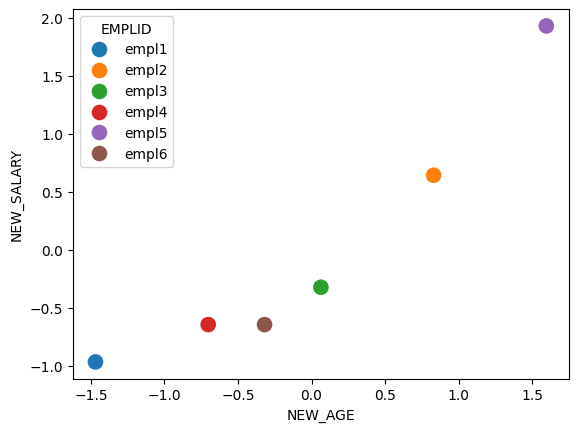

In [19]:
print(f'''AGE: \n Mean: {df1_1['NEW_AGE'].mean()} \n standard deviation: {df1_1['NEW_AGE'].std()} \n
SALARY: \n Mean: {df1_1['NEW_SALARY'].mean()} \n standard deviation: {df1_1['NEW_SALARY'].std()}''')
sns.scatterplot(data=df1_1, x=df1_1['NEW_AGE'], y=df1_1['NEW_SALARY'], hue=df1_1['EMPLID'], s=150)

<Axes: xlabel='NEW_AGE', ylabel='NEW_SALARY'>

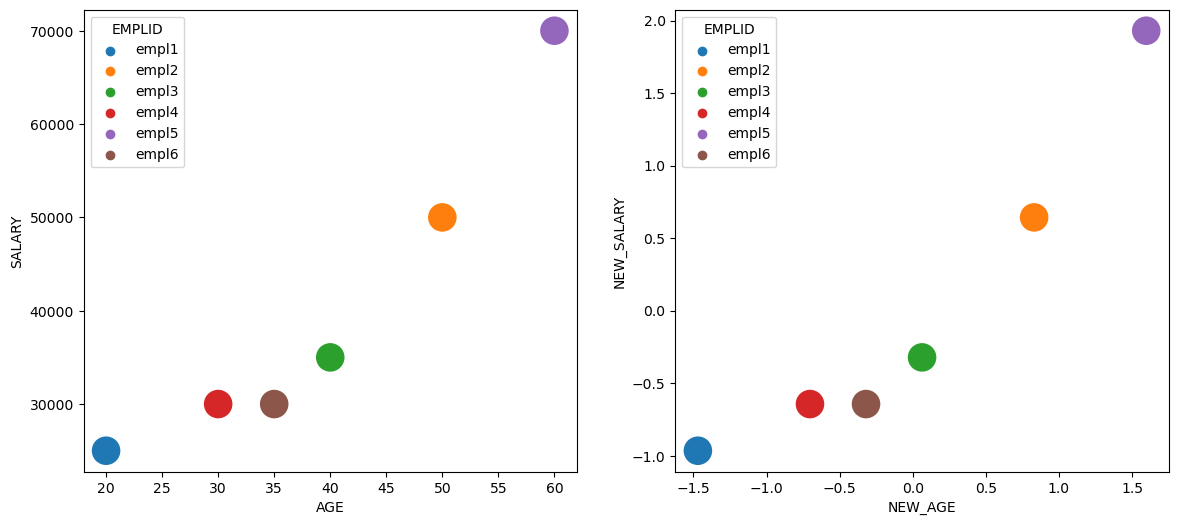

In [170]:
fig, axis = plt.subplots(1,2, figsize=(14,6))
#fist plot
sns.scatterplot(data=df1,x=df['AGE'],y=df['SALARY'],hue=df['EMPLID'],s=500, ax=axis[0])
#second plot
sns.scatterplot(data=df1_1, x=df1_1['NEW_AGE'], y=df1_1['NEW_SALARY'], hue=df1_1['EMPLID'], s=500, ax=axis[1])
plt.tight_layout()
plt.show()

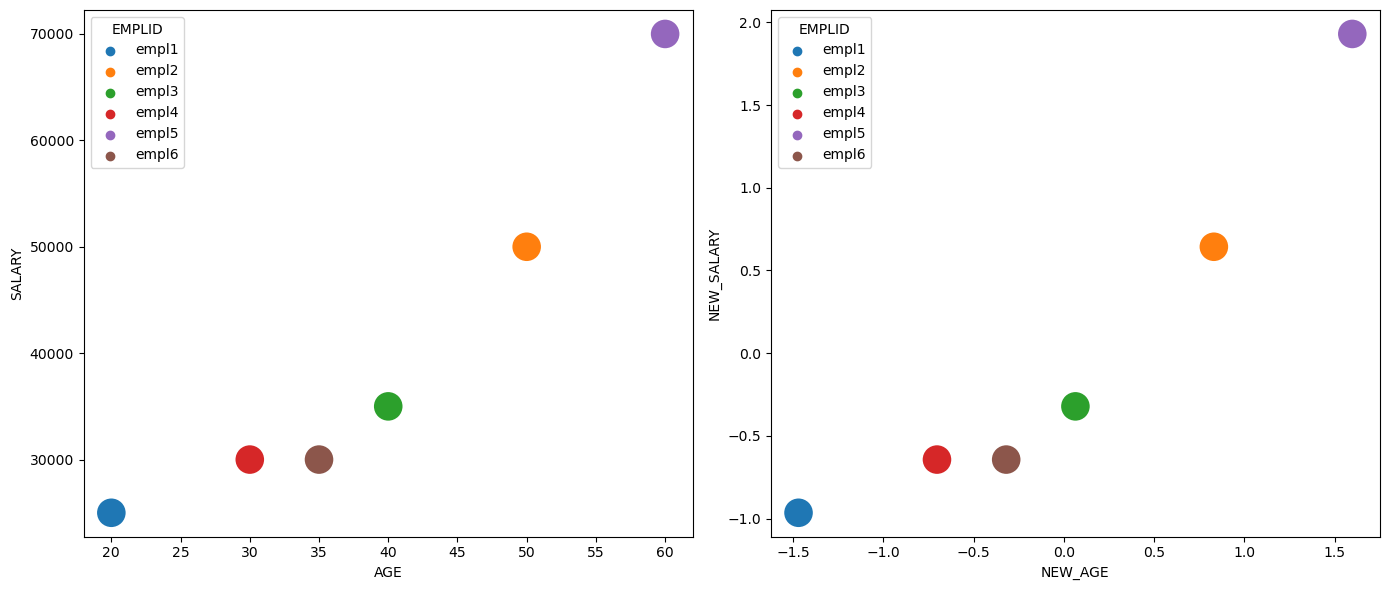

In [171]:
fig, axis = plt.subplots(1,2, figsize=(14,6))
#fist plot
sns.scatterplot(data=df1,x=df['AGE'],y=df['SALARY'],hue=df['EMPLID'],s=500, ax=axis[0])
#second plot
sns.scatterplot(data=df1_1, x=df1_1['NEW_AGE'], y=df1_1['NEW_SALARY'], hue=df1_1['EMPLID'], s=500, ax=axis[1])
plt.tight_layout()
plt.show()

# Normalization vs Standardization

In [21]:
df2 = pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data Science - Python\Python Practice\Data source\500hits.csv')
df2.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [22]:
df2.describe()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.00000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,17.049462,2048.698925,7511.455914,1150.313978,2170.247312,380.952688,78.554839,201.049462,894.260215,783.56129,847.470968,195.905376,58.083871,0.288712,0.329032
std,2.765186,354.391805,1294.065992,289.635071,424.190773,96.483460,49.363030,143.622664,486.193456,327.43195,489.224289,181.845543,48.027509,0.021208,0.474928
min,11.000000,1331.000000,4981.000000,601.000000,1660.000000,177.000000,3.000000,9.000000,0.000000,239.00000,0.000000,7.000000,0.000000,0.246000,0.000000
25%,15.000000,1802.000000,6523.000000,936.000000,1838.000000,312.000000,41.000000,79.000000,640.000000,535.00000,436.000000,63.000000,22.000000,0.273000,0.000000
50%,17.000000,1993.000000,7241.000000,1104.000000,2076.000000,366.000000,67.000000,178.000000,968.000000,736.00000,825.000000,137.000000,52.000000,0.287000,0.000000
75%,19.000000,2247.000000,8180.000000,1296.000000,2375.000000,436.000000,107.000000,292.000000,1206.000000,955.00000,1226.000000,285.000000,84.000000,0.300000,1.000000
max,26.000000,3308.000000,12364.000000,2295.000000,4189.000000,792.000000,309.000000,755.000000,2297.000000,2190.00000,2597.000000,1406.000000,335.000000,0.366000,2.000000


<b> converting the str values into int

In [23]:
from sklearn.preprocessing import OrdinalEncoder

OR = OrdinalEncoder()
df2['PLAYER'] = OR.fit_transform(df2[['PLAYER']])
df2

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,438.0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,402.0,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,437.0,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,117.0,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,210.0,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,237.0,15,1920,6653,1105,1665,285,39,291,964,1224,1427,225,101,0.250,0
461,267.0,17,1829,6092,900,1664,379,10,275,1065,936,1453,20,21,0.273,0
462,61.0,15,1834,6499,1062,1661,338,67,210,761,960,1190,315,100,0.256,0
463,94.0,16,1822,6309,714,1660,254,25,54,593,396,489,74,68,0.263,0


In [215]:
df2.describe().round(3)
# df2 = df2.drop(columns=['CS'])
df2.columns

Index(['PLAYER', 'YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB',
       'SO', 'SB', 'BA', 'HOF'],
      dtype='object')


### x1 - standard scalar
### x2 - min max scalar


In [24]:
x1 = df2.iloc[:, 1:13]
x2 = df2.iloc[:, 1:13]
x1

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722
...,...,...,...,...,...,...,...,...,...,...,...,...
460,15,1920,6653,1105,1665,285,39,291,964,1224,1427,225
461,17,1829,6092,900,1664,379,10,275,1065,936,1453,20
462,15,1834,6499,1062,1661,338,67,210,761,960,1190,315
463,16,1822,6309,714,1660,254,25,54,593,396,489,74


In [50]:
scaleStandard = StandardScaler()
x1 = scaleStandard.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=['YRS_1', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB',
       'SO', 'SB'])
x1

,YRS_1,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB
0,2.516295,2.786078,3.034442,3.787062,4.764193,3.559333,4.389485,-0.585841,-0.346449,1.423013,-1.003628,3.832067
1,1.792237,2.760655,2.677044,2.760530,3.444971,3.569709,1.996457,1.909487,2.175837,2.493089,-0.309948,-0.649080
2,1.792237,2.091184,2.075964,2.528955,3.171214,4.264876,2.909053,-0.585841,-0.350567,1.826585,-1.283965,1.299723
3,1.068180,1.972543,2.849554,2.670665,3.055576,1.691719,-0.254611,0.410896,0.858071,0.912434,2.030966,0.892346
4,1.430208,2.099658,2.257758,2.024329,2.972977,2.687780,3.517449,-0.697364,-1.841290,0.548609,-1.065016,2.896201
...,...,...,...,...,...,...,...,...,...,...,...,...
460,-0.741964,-0.363545,-0.664093,-0.156620,-1.192368,-0.995570,-0.802168,0.626972,0.143595,1.346579,1.185863,0.160169
461,-0.017907,-0.620600,-1.098077,-0.865170,-1.194728,-0.020260,-1.390285,0.515449,0.351555,0.466060,1.239066,-0.968376
462,-0.741964,-0.606476,-0.783226,-0.305243,-1.201808,-0.445661,-0.234331,0.062387,-0.274384,0.539436,0.700901,0.655627
463,-0.379936,-0.640373,-0.930208,-1.508049,-1.204168,-1.317215,-1.086086,-1.024962,-0.620298,-1.184914,-0.733523,-0.671101


In [51]:
x1.describe().round(2)

,YRS_1,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.19,-2.03,-1.96,-1.90,-1.20,-2.12,-1.53,-1.34,-1.84,-1.66,-1.73,-1.04
25%,-0.74,-0.70,-0.76,-0.74,-0.78,-0.72,-0.76,-0.85,-0.52,-0.76,-0.84,-0.73
50%,-0.02,-0.16,-0.21,-0.16,-0.22,-0.16,-0.23,-0.16,0.15,-0.15,-0.05,-0.32
75%,0.71,0.56,0.52,0.50,0.48,0.57,0.58,0.63,0.64,0.52,0.77,0.49
max,3.24,3.56,3.75,3.96,4.76,4.26,4.67,3.86,2.89,4.30,3.58,6.66


In [225]:
scale_Min_Max = MinMaxScaler()
x2 = scale_Min_Max.fit_transform(x2)
x2 = pd.DataFrame(x2, columns=['YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB',
       'SO', 'SB'])
x2

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB
0,0.866667,0.861912,0.874035,0.971074,1.000000,0.889431,0.954248,0.144772,0.316064,0.517683,0.137466,0.632595
1,0.733333,0.857360,0.811459,0.795750,0.778964,0.891057,0.568627,0.624665,0.849369,0.697078,0.268002,0.050751
2,0.733333,0.737481,0.706217,0.756198,0.733096,1.000000,0.715686,0.144772,0.315194,0.585341,0.084713,0.303788
3,0.600000,0.716237,0.841663,0.780401,0.713721,0.596748,0.205882,0.336461,0.570744,0.432086,0.708510,0.250893
4,0.666667,0.738998,0.738047,0.670012,0.699881,0.752846,0.813725,0.123324,0.000000,0.371092,0.125915,0.511079
...,...,...,...,...,...,...,...,...,...,...,...,...
460,0.266667,0.297926,0.226466,0.297521,0.001977,0.175610,0.117647,0.378016,0.419678,0.504869,0.549480,0.155826
461,0.400000,0.251897,0.150481,0.176505,0.001582,0.328455,0.022876,0.356568,0.463648,0.357253,0.559492,0.009292
462,0.266667,0.254426,0.205607,0.272137,0.000395,0.261789,0.209150,0.269437,0.331302,0.369554,0.458221,0.220157
463,0.333333,0.248356,0.179873,0.066706,0.000000,0.125203,0.071895,0.060322,0.258163,0.080472,0.188294,0.047891


In [226]:
x2.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,0.403,0.363,0.343,0.324,0.202,0.332,0.247,0.257,0.389,0.279,0.326,0.135
std,0.184,0.179,0.175,0.171,0.168,0.157,0.161,0.193,0.212,0.168,0.188,0.130
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.267,0.238,0.209,0.198,0.070,0.220,0.124,0.094,0.279,0.152,0.168,0.040
50%,0.400,0.335,0.306,0.297,0.164,0.307,0.209,0.227,0.421,0.255,0.318,0.093
75%,0.533,0.463,0.433,0.410,0.283,0.421,0.340,0.379,0.525,0.367,0.472,0.199
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [25]:
x1.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,17.049,2048.699,7511.456,1150.314,2170.247,380.953,78.555,201.049,894.260,783.561,847.471,195.905
std,2.765,354.392,1294.066,289.635,424.191,96.483,49.363,143.623,486.193,327.432,489.224,181.846
min,11.000,1331.000,4981.000,601.000,1660.000,177.000,3.000,9.000,0.000,239.000,0.000,7.000
25%,15.000,1802.000,6523.000,936.000,1838.000,312.000,41.000,79.000,640.000,535.000,436.000,63.000
50%,17.000,1993.000,7241.000,1104.000,2076.000,366.000,67.000,178.000,968.000,736.000,825.000,137.000
75%,19.000,2247.000,8180.000,1296.000,2375.000,436.000,107.000,292.000,1206.000,955.000,1226.000,285.000
max,26.000,3308.000,12364.000,2295.000,4189.000,792.000,309.000,755.000,2297.000,2190.000,2597.000,1406.000
